In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error  # MSE
from sklearn.metrics import mean_absolute_error  # MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb

In [2]:
numOfNeighBour = 14

#  MAPE和SMAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100


# mape(y_true, y_pred)
# smape(y_true, y_pred)

print('Loading data...')

# imput csv data
df = pd.read_csv('data-NormDis20230419.csv')
data=df.drop_duplicates(subset=['N','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10',
                                       'a1','a2','a3','a4','a5','a6','a7','a8','a9','a0',
                                       'b1','b2','b3','b4','b5','b6','b7','b8','b9','b0'])

list1 = ['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10',
                                       'a1','a2','a3','a4','a5','a6','a7','a8','a9','a0',
                                       'b1','b2','b3','b4','b5','b6','b7','b8','b9','b0']
list2 = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a0',
                                       'b1','b2','b3','b4','b5','b6','b7','b8','b9','b0']
for i in list1:
    print(i)
    max_tmp = np.max(np.array(data[i]))
    min_tmp = np.min(np.array(data[i]))
    if(max_tmp!=min_tmp):
        if i in list2:
            data[i+'n'] = data[i].apply (lambda x: (x - min_tmp) / (max_tmp - min_tmp))
        else:
            data[i+'n'] = data[i] 
    else:
        data[i+'n'] = data[i] 

iris_X = data.iloc[:, -30:]
print(iris_X)
iris_y1 = data.iloc[0:,31:-32]  # c
iris_y1

Loading data...
d1
d2
d3
d4
d5
d6
d7
d8
d9
d10
a1
a2
a3
a4
a5
a6
a7
a8
a9
a0
b1
b2
b3
b4
b5
b6
b7
b8
b9
b0
     d1n  d2n  d3n  d4n  d5n  d6n  d7n  d8n  d9n  d10n  ...       b1n  \
0      1    2    4    2    1    2    1    2    1     4  ...  0.186117   
1      1    1    3    1    2    2    2    2    1     5  ...  0.599598   
2      1    1    3    2    1    2    1    4    2     3  ...  0.643863   
3      1    3    3    1    1    2    2    1    2     4  ...  0.431590   
4      1    1    2    2    1    2    1    4    3     3  ...  0.022133   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...       ...   
462    1    1    4    1    1    5    3    1    2     1  ...  0.039235   
463    5    1    2    1    1    4    1    2    2     1  ...  0.562374   
464    3    1    2    1    3    2    3    1    3     1  ...  0.445674   
465    5    1    1    1    2    1    1    1    4     3  ...  0.269618   
466    4    1    2    1    2    2    5    1    1     1  ...  0.897384   

          b2n   

,0 1 1,0 1 2,0 1 3,0 1 4,0 1 5,0 1 6,0 1 7,0 1 8,0 1 9,0 1 10,...,20 10 2,20 10 3,20 10 4,20 10 5,20 10 6,20 10 7,20 10 8,20 10 9,20 10 10,20 10 11
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
464,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train, X_test, y_train, y_test = \
    train_test_split(iris_X, iris_y1, test_size=0.1, random_state= 1)

# train model
model1 = KNeighborsRegressor(n_neighbors=numOfNeighBour)
model1.fit(X_train, y_train)

print('Saving model...')
# save model to file
with open('KNN_model.pk4', 'wb') as f:
    pickle.dump(model1, f)



Saving model...


In [4]:
print('Starting predicting...')
y1_pred = model1.predict(X_test)
y1_pred

Starting predicting...


array([[1.        , 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.07142857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14285714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.92857143, 0.35714286, 0.14285714, ..., 0.        , 0.        ,
        0.        ]])

In [5]:
data[(data['d1']==3) & (data['d2']==2)& (data['d3']==3)].drop_duplicates(subset=['N','d1','d2','d3','d4','d5'])

,N,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,b1n,b2n,b3n,b4n,b5n,b6n,b7n,b8n,b9n,b0n
42,10,3,2,3,3,1,1,2,2,1,...,0.233400,0.253012,0.854125,0.526052,0.461949,0.369565,0.190141,0.084422,0.365772,0.908257
76,10,3,2,3,2,1,1,1,3,2,...,0.723340,0.921687,0.706237,0.448898,0.446595,0.157191,0.649899,0.272362,0.461969,0.742285
302,10,3,2,3,1,3,1,1,1,3,...,0.147887,0.630522,0.429577,0.939880,0.129172,0.424749,0.968813,0.522613,0.543624,0.341952
340,10,3,2,3,1,1,3,1,3,2,...,0.410463,0.717871,0.724346,0.411824,0.728638,0.000000,0.261066,0.595980,0.555928,0.041701


In [6]:
data.head()

,N,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,b1n,b2n,b3n,b4n,b5n,b6n,b7n,b8n,b9n,b0n
0,10,1,2,4,2,1,2,1,2,1,...,0.186117,0.970382,0.529175,0.612224,0.766689,0.933110,0.361167,0.598995,0.287472,0.695580
1,10,1,1,3,1,2,2,2,2,1,...,0.599598,0.526606,0.552314,0.078156,0.221295,0.433110,0.591549,0.645226,0.946309,0.045038
2,10,1,1,3,2,1,2,1,4,2,...,0.643863,0.034137,0.638833,0.085170,0.358478,0.107023,0.314386,0.103518,0.934004,0.398666
3,10,1,3,3,1,1,2,2,1,2,...,0.431590,0.155120,0.251509,0.757515,0.315754,0.155518,0.285211,0.489447,0.950783,0.883236
4,10,1,1,2,2,1,2,1,4,3,...,0.022133,0.508032,0.368209,0.140281,0.473632,0.618729,0.056338,0.185930,0.512304,0.746455


In [7]:
data.columns[:-32].values

array(['N', 'd1', 'd2', ..., '20 10 9', '20 10 10', '20 10 11'],
      dtype=object)

In [8]:
res=pd.DataFrame(columns = data.columns[31:-32].values)
res

,0 1 1,0 1 2,0 1 3,0 1 4,0 1 5,0 1 6,0 1 7,0 1 8,0 1 9,0 1 10,...,20 10 2,20 10 3,20 10 4,20 10 5,20 10 6,20 10 7,20 10 8,20 10 9,20 10 10,20 10 11


In [9]:
data.columns[np.r_[data.shape[1]-30:data.shape[1],31:data.shape[1]-32]].values

array(['d1n', 'd2n', 'd3n', ..., '20 10 9', '20 10 10', '20 10 11'],
      dtype=object)

In [10]:
np.r_[31:data.shape[1]-32,data.shape[1]-30:data.shape[1]]

array([  31,   32,   33, ..., 2370, 2371, 2372])

In [11]:
data.shape[1]

2373

In [12]:
#res.columns = ['_'.join(col) for col in res.columns.values]
res.columns

Index(['0 1 1', '0 1 2', '0 1 3', '0 1 4', '0 1 5', '0 1 6', '0 1 7', '0 1 8',
       '0 1 9', '0 1 10',
       ...
       '20 10 2', '20 10 3', '20 10 4', '20 10 5', '20 10 6', '20 10 7',
       '20 10 8', '20 10 9', '20 10 10', '20 10 11'],
      dtype='object', length=2310)

In [13]:
res=pd.DataFrame(columns=[data.columns[np.r_[data.shape[1]-30:data.shape[1],31:data.shape[1]-32]].values])
for i in range(y1_pred.shape[0]):
    #res.loc[i]=X_test.values[i].tolist()+y1_pred[i].tolist()
    res.loc[i]=X_test.values[i].tolist()+y1_pred[i].tolist()
    
res.columns = ['_'.join(col) for col in res.columns.values]
#res.loc[0]=[5,3,2,3,2,5]+y1_pred[0].tolist()
#res=res.append(pd.Series([5,3,2,3,2,5]+y1_pred[0].tolist()), ignore_index=True)
tmp=data[['N','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10',                                     
          'a1','a2','a3','a4','a5','a6','a7','a8','a9','a0',
          'b1','b2','b3','b4','b5','b6','b7','b8','b9','b0',
          'd1n','d2n','d3n','d4n','d5n','d6n','d7n','d8n','d9n','d10n',                                     
          'makespan','computeTime']]



In [14]:
res.iloc[:,:30]

,d1n,d2n,d3n,d4n,d5n,d6n,d7n,d8n,d9n,d10n,...,b1n,b2n,b3n,b4n,b5n,b6n,b7n,b8n,b9n,b0n
0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,4.0,1.0,...,0.039235,0.105422,0.508048,0.912826,0.871495,0.764214,0.496479,0.919598,0.268456,0.677231
1,1.0,3.0,1.0,1.0,3.0,5.0,2.0,1.0,2.0,1.0,...,0.511066,0.622992,0.809859,0.020040,0.322430,0.274247,0.500000,0.921608,0.913870,0.936614
2,1.0,1.0,4.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,...,0.403421,0.237450,0.282696,0.592184,0.213284,0.501672,0.000000,0.977889,0.000000,0.344454
3,1.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,...,0.448692,0.192771,0.980885,0.842685,0.459947,0.749164,0.112173,0.736683,0.925056,0.155129
4,2.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,...,0.650905,0.931727,0.260563,0.610220,0.265354,0.518395,0.068410,0.193970,0.427293,0.813178
5,2.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,3.0,...,0.740443,0.238956,0.243461,0.422846,0.866155,0.812709,0.332495,0.284422,0.234899,0.201001
6,1.0,1.0,6.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,...,0.664990,0.885040,0.115694,0.138277,0.284045,0.314381,0.436620,0.735678,0.642058,0.654712
7,1.0,1.0,2.0,2.0,2.0,5.0,1.0,3.0,1.0,2.0,...,0.227364,0.595382,0.141851,0.286573,0.694927,0.525084,0.494467,0.851256,0.310962,0.668891
8,2.0,1.0,4.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,...,0.773642,0.240462,0.738431,0.931864,0.022697,0.973244,0.774648,0.457286,0.012304,0.402002
9,1.0,3.0,1.0,1.0,3.0,2.0,5.0,2.0,1.0,1.0,...,0.458753,0.962851,0.401408,0.455912,0.472630,0.451505,0.121227,0.550754,0.000000,0.209341


In [15]:
pd.merge(res,tmp)

,d1n,d2n,d3n,d4n,d5n,d6n,d7n,d8n,d9n,d10n,...,b3,b4,b5,b6,b7,b8,b9,b0,makespan,computeTime
0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,4.0,1.0,...,50.07,54.12,161.13,31.58,99.91,54.20,42.96,62.12,1881.00,1903.240
1,1.0,3.0,1.0,1.0,3.0,5.0,2.0,1.0,2.0,1.0,...,53.07,45.21,144.68,28.65,99.98,54.22,48.73,65.23,1939.50,944.980
2,1.0,1.0,4.0,3.0,2.0,1.0,3.0,3.0,1.0,1.0,...,47.83,50.92,141.41,30.01,90.04,54.78,40.56,58.13,1880.50,1707.240
3,1.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,3.0,...,54.77,53.42,148.80,31.49,92.27,52.38,48.83,55.86,1865.11,3044.930
4,2.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,...,47.61,51.10,142.97,30.11,91.40,46.98,44.38,63.75,1822.50,2708.170
5,2.0,1.0,2.0,1.0,2.0,3.0,3.0,2.0,1.0,3.0,...,47.44,49.23,160.97,31.87,96.65,47.88,42.66,56.41,1866.86,1996.720
6,1.0,1.0,6.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,...,46.17,46.39,143.53,28.89,98.72,52.37,46.30,61.85,1820.00,949.984
7,1.0,1.0,2.0,2.0,2.0,5.0,1.0,3.0,1.0,2.0,...,46.43,47.87,155.84,30.15,99.87,53.52,43.34,62.02,1868.50,1341.270
8,2.0,1.0,4.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,...,52.36,54.31,135.70,32.83,105.44,49.60,40.67,58.82,1863.50,1596.760
9,1.0,3.0,1.0,1.0,3.0,2.0,5.0,2.0,1.0,1.0,...,49.01,49.56,149.18,29.71,92.45,50.53,40.56,56.51,1915.50,1700.440


In [16]:
data2 = pd.merge(res,tmp)

In [17]:
data2 = data2.drop(data2.columns[:30], axis=1)
data2

,0 1 1,0 1 2,0 1 3,0 1 4,0 1 5,0 1 6,0 1 7,0 1 8,0 1 9,0 1 10,...,b3,b4,b5,b6,b7,b8,b9,b0,makespan,computeTime
0,1.000000,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,50.07,54.12,161.13,31.58,99.91,54.20,42.96,62.12,1881.00,1903.240
1,1.000000,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,53.07,45.21,144.68,28.65,99.98,54.22,48.73,65.23,1939.50,944.980
2,1.000000,0.071429,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,47.83,50.92,141.41,30.01,90.04,54.78,40.56,58.13,1880.50,1707.240
3,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,54.77,53.42,148.80,31.49,92.27,52.38,48.83,55.86,1865.11,3044.930
4,1.000000,0.214286,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,47.61,51.10,142.97,30.11,91.40,46.98,44.38,63.75,1822.50,2708.170
5,1.000000,0.285714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,47.44,49.23,160.97,31.87,96.65,47.88,42.66,56.41,1866.86,1996.720
6,1.000000,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,46.17,46.39,143.53,28.89,98.72,52.37,46.30,61.85,1820.00,949.984
7,0.928571,0.357143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,46.43,47.87,155.84,30.15,99.87,53.52,43.34,62.02,1868.50,1341.270
8,0.928571,0.357143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,52.36,54.31,135.70,32.83,105.44,49.60,40.67,58.82,1863.50,1596.760
9,1.000000,0.357143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,49.01,49.56,149.18,29.71,92.45,50.53,40.56,56.51,1915.50,1700.440


In [18]:
data3 = data2.loc[:,data2.columns[-33:-2]]
list3 = list(data3.columns)
list3.reverse()
columns1 = list(data2.columns)
for i in list3:
    columns1.insert(0, columns1.pop(columns1.index(i)))

data2 = data2.loc[:, columns1]
data2.to_csv('predNORM20231020_'+str(numOfNeighBour)+'.csv',index=None)

In [19]:
data3 = data2.loc[:,data2.columns[-33:-2]]
list3 = list(data3.columns)
list3.reverse()
print(list3)

['20 10 11', '20 10 10', '20 10 9', '20 10 8', '20 10 7', '20 10 6', '20 10 5', '20 10 4', '20 10 3', '20 10 2', '20 10 1', '20 9 11', '20 9 10', '20 9 9', '20 9 8', '20 9 7', '20 9 6', '20 9 5', '20 9 4', '20 9 3', '20 9 2', '20 9 1', '20 8 11', '20 8 10', '20 8 9', '20 8 8', '20 8 7', '20 8 6', '20 8 5', '20 8 4', '20 8 3']


In [20]:
list(data3.columns)

['20 8 3',
 '20 8 4',
 '20 8 5',
 '20 8 6',
 '20 8 7',
 '20 8 8',
 '20 8 9',
 '20 8 10',
 '20 8 11',
 '20 9 1',
 '20 9 2',
 '20 9 3',
 '20 9 4',
 '20 9 5',
 '20 9 6',
 '20 9 7',
 '20 9 8',
 '20 9 9',
 '20 9 10',
 '20 9 11',
 '20 10 1',
 '20 10 2',
 '20 10 3',
 '20 10 4',
 '20 10 5',
 '20 10 6',
 '20 10 7',
 '20 10 8',
 '20 10 9',
 '20 10 10',
 '20 10 11']

<AxesSubplot:>

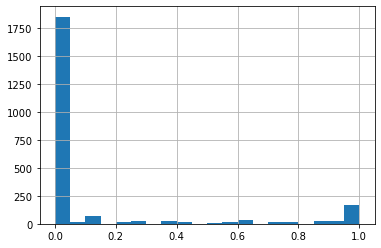

In [21]:
pd.Series(y1_pred[0].tolist()).hist(bins=20)